In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
original_data = pd.read_csv('/content/drive/MyDrive/FINAL YEAR PROJECT/fer2013.csv')

In [ ]:
original_data.drop('Usage', axis=1, inplace=True)

emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
original_data['emotion'] = original_data['emotion'].map(emotion_map)

In [ ]:
original_data.head(10)

,emotion,pixels
0,Angry,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,Angry,151 150 147 155 148 133 111 140 170 174 182 15...
2,Fear,231 212 156 164 174 138 161 173 182 200 106 38...
3,Sad,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,Neutral,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
5,Fear,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...
6,Sad,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
7,Happy,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
8,Happy,85 84 90 121 101 102 133 153 153 169 177 189 1...
9,Fear,255 254 255 254 254 179 122 107 95 124 149 150...


In [ ]:
import random

random.seed(42)

emp_id = [random.randint(0, 35887) for _ in range(2000)]
print(emp_id)

[7296, 1639, 18024, 16049, 14628, 9144, 6717, 35741, 5697, 27651, 2082, 1952, 6140, 14328, 15247, 33118, 1739, 13031, 35713, 27493, 14446, 29439, 18231, 425, 10463, 27696, 22298, 18210, 10189, 14110, 22059, 6698, 6078, 24898, 6338, 23526, 22541, 17335, 2847, 30108, 35142, 8180, 24807, 5164, 19213, 23700, 12601, 4558, 3003, 14935, 18965, 5229, 15256, 6619, 24911, 18217, 29714, 23909, 10659, 24260, 23283, 13730, 17496, 4679, 11215, 35005, 16043, 10708, 30294, 24867, 17691, 14392, 21252, 3665, 15010, 2103, 20673, 26290, 17546, 4337, 13826, 20622, 13934, 32717, 25928, 30071, 9363, 17359, 9150, 16162, 35322, 17219, 28077, 26175, 23723, 14373, 9065, 33392, 32343, 5957, 3087, 7185, 10016, 10484, 27666, 4163, 25216, 25009, 30674, 34676, 16476, 752, 7507, 35190, 17486, 22293, 7310, 19234, 28492, 10365, 29735, 212, 17261, 32806, 11708, 33271, 6973, 19558, 33270, 13035, 10016, 24504, 10587, 35348, 34757, 37, 21243, 32021, 1276, 7331, 23788, 20153, 15692, 3796, 15785, 5161, 5613, 31849, 4535, 3491

In [ ]:
emp_emotions = pd.DataFrame(columns=original_data.columns)

for id in emp_id:
    emp_emotions = pd.concat([emp_emotions, original_data.iloc[id].to_frame().T])

In [ ]:
emp_emotions

,emotion,pixels
7296,Angry,162 153 141 144 141 129 115 123 142 149 151 14...
1639,Angry,30 22 17 20 16 16 10 19 27 49 80 99 111 125 13...
18024,Neutral,95 86 91 85 81 83 88 89 90 88 86 90 89 86 88 8...
16049,Neutral,137 131 108 83 88 58 84 92 116 139 157 170 174...
14628,Sad,253 159 36 50 42 41 44 46 43 53 67 86 174 187 ...
...,...,...
29776,Happy,109 104 108 110 111 111 113 117 119 119 126 13...
35605,Sad,85 63 62 71 72 88 103 67 97 140 69 79 117 191 ...
34361,Happy,31 27 29 27 36 34 33 33 30 36 34 33 42 72 122 ...
32369,Surprise,122 109 95 115 117 108 107 106 97 82 58 57 50 ...


In [ ]:
emp_emotions.index.name = 'emp_id'

In [ ]:
emp_emotions.to_csv('/content/drive/MyDrive/FINAL YEAR PROJECT/emp_emotions.csv')

In [ ]:
emotion_counts = emp_emotions['emotion'].value_counts(sort=False).reset_index()
emotion_counts

,index,emotion
0,Angry,271
1,Neutral,327
2,Sad,352
3,Happy,507
4,Surprise,217
5,Fear,291
6,Digust,35


In [ ]:
from collections import Counter

counts = Counter(emp_emotions['emotion'])
counts

Counter({'Angry': 271,
         'Neutral': 327,
         'Sad': 352,
         'Happy': 507,
         'Surprise': 217,
         'Fear': 291,
         'Digust': 35})

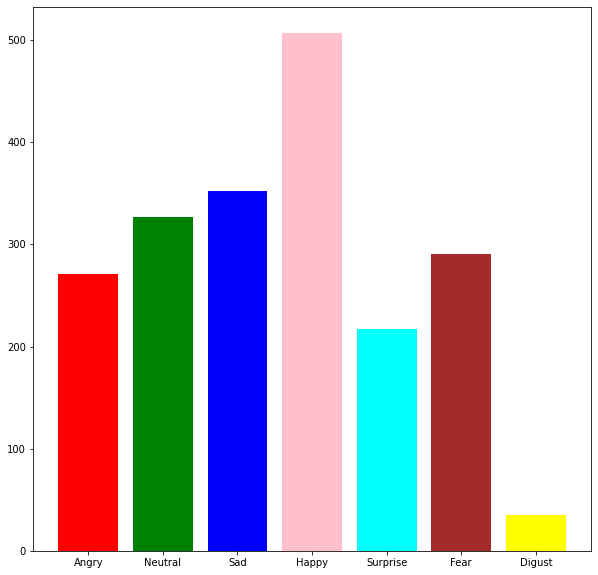

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))

colors = ['red', 'green', 'blue', 'pink', 'cyan', 'brown', 'yellow']
ax.bar(list(counts.keys()), list(counts.values()), color=colors)
plt.show()

## DATASET STRUCURE:
* **EMPLOYEE ID**
* **DEPARTMENT**
    * ENGINEERING
    * ACCOUNTS
    * HR
    * SALES
* **PROJECT ID**
* **PROJECT MANAGER**

In [ ]:
emp_emotions = pd.read_csv('/content/drive/MyDrive/FINAL YEAR PROJECT/emp_emotions.csv')

In [ ]:
employee_details = pd.DataFrame(columns=['emp_id', 'dept', 'project', 'manager'])
employee_details['emp_id'] = emp_emotions['emp_id']
employee_details

,emp_id,dept,project,manager
0,7296,NaN,NaN,NaN
1,1639,NaN,NaN,NaN
2,18024,NaN,NaN,NaN
3,16049,NaN,NaN,NaN
4,14628,NaN,NaN,NaN
...,...,...,...,...
1995,29776,NaN,NaN,NaN
1996,35605,NaN,NaN,NaN
1997,34361,NaN,NaN,NaN
1998,32369,NaN,NaN,NaN


In [ ]:
# department assignment
company_details = (
    ('Engineering', 'e1', 'Abhigyan Datta'),
    ('Engineering', 'e2', 'Arijit Saha'),
    ('HR', 'h1', 'Ishika Roy'),
    ('HR', 'h2', 'Anushka Ghosh'),
    ('Sales', 's1', 'Bruce Wayne'),
    ('Sales', 's2', 'Frank Castle'),
    ('Accounts', 'a1', 'Matt Murdock'),
    ('Accounts', 'a2', 'Hannibal Lecter')
)

job_assign = employee_details['emp_id'].values
np.random.shuffle(job_assign)
job_assign = np.split(job_assign, 8)
job_assign

[array([22059, 28562,  2455, 12445, 13774, 14238, 20444,  7476, 25138,
        24260, 11526,  8029,  3832, 10614,  8352, 28479, 20776, 33635,
        22859, 14267, 35190,  5679,   232, 18217, 33733, 26427, 21109,
        24962, 30534, 18850, 18621, 11370, 21532,  4940, 31578, 28780,
        23210, 35269,  6344, 18813, 25982, 10403,  2908, 18292, 19252,
        27445, 29939, 34477, 22896, 19569, 21757, 22910,  9015, 24928,
        35071, 23127, 16546, 10589,  2863, 29729, 17181, 13829, 31122,
        35560,  3413,  9479, 15633, 21826,  9679,   803, 24720,  4484,
        35598,  9684, 21532,  9768,  9409, 30071, 12440,  4772,  6231,
        18676, 29593,  6678,  4549,  6698,  9599, 34475,  4652, 12556,
        30166, 11409,  6124, 15872, 34567, 14380,  6793, 14694, 31731,
        30737, 13969, 12600, 35339, 12521, 35343, 35688, 27722, 29170,
        35791,  7762, 30130,  3513,   615,  8504,  3382,  5175, 33271,
        15297,  2860, 24285, 10258, 22212, 26613, 10466, 17902, 33905,
      

In [ ]:
employee_details.set_index('emp_id', inplace=True)

In [ ]:
employee_details.loc[16049]['dept'] = 'abcd'
employee_details

,dept,project,manager
emp_id,,,
7296,NaN,NaN,NaN
1639,NaN,NaN,NaN
18024,NaN,NaN,NaN
16049,abcd,NaN,NaN
14628,NaN,NaN,NaN
...,...,...,...
29776,NaN,NaN,NaN
35605,NaN,NaN,NaN
34361,NaN,NaN,NaN


In [ ]:
for i,v in enumerate(job_assign):
    for job in v:
        employee_details.loc[job, 'dept'] = company_details[i][0]
        employee_details.loc[job, 'project'] = company_details[i][1]
        employee_details.loc[job, 'manager'] = company_details[i][2]

employee_details.head(10)

,dept,project,manager
emp_id,,,
7296,Sales,s2,Frank Castle
1639,Sales,s1,Bruce Wayne
18024,HR,h2,Anushka Ghosh
16049,Sales,s1,Bruce Wayne
14628,Accounts,a1,Matt Murdock
...,...,...,...
29776,Engineering,e1,Abhigyan Datta
35605,Engineering,e2,Arijit Saha
34361,Engineering,e2,Arijit Saha


In [ ]:
employee_details.to_csv('/content/drive/MyDrive/FINAL YEAR PROJECT/emp_details.csv')

In [ ]:
employee_details = pd.read_csv('/content/drive/MyDrive/FINAL YEAR PROJECT/emp_details.csv')

In [ ]:
employee_details = pd.merge(employee_details, emp_emotions, on='emp_id', how='inner')
employee_details

,emp_id,dept,project,manager,emotion,pixels
0,7296,Sales,s2,Frank Castle,Angry,162 153 141 144 141 129 115 123 142 149 151 14...
1,1639,Sales,s1,Bruce Wayne,Angry,30 22 17 20 16 16 10 19 27 49 80 99 111 125 13...
2,18024,HR,h2,Anushka Ghosh,Neutral,95 86 91 85 81 83 88 89 90 88 86 90 89 86 88 8...
3,16049,Sales,s1,Bruce Wayne,Neutral,137 131 108 83 88 58 84 92 116 139 157 170 174...
4,14628,Accounts,a1,Matt Murdock,Sad,253 159 36 50 42 41 44 46 43 53 67 86 174 187 ...
...,...,...,...,...,...,...
2095,29776,Engineering,e1,Abhigyan Datta,Happy,109 104 108 110 111 111 113 117 119 119 126 13...
2096,35605,Engineering,e2,Arijit Saha,Sad,85 63 62 71 72 88 103 67 97 140 69 79 117 191 ...
2097,34361,Engineering,e2,Arijit Saha,Happy,31 27 29 27 36 34 33 33 30 36 34 33 42 72 122 ...
2098,32369,Sales,s2,Frank Castle,Surprise,122 109 95 115 117 108 107 106 97 82 58 57 50 ...


In [ ]:
employee_details.head(10)

,emp_id,dept,project,manager,emotion,pixels
0,7296,Sales,s2,Frank Castle,Angry,162 153 141 144 141 129 115 123 142 149 151 14...
1,1639,Sales,s1,Bruce Wayne,Angry,30 22 17 20 16 16 10 19 27 49 80 99 111 125 13...
2,18024,HR,h2,Anushka Ghosh,Neutral,95 86 91 85 81 83 88 89 90 88 86 90 89 86 88 8...
3,16049,Sales,s1,Bruce Wayne,Neutral,137 131 108 83 88 58 84 92 116 139 157 170 174...
4,14628,Accounts,a1,Matt Murdock,Sad,253 159 36 50 42 41 44 46 43 53 67 86 174 187 ...
5,9144,HR,h2,Anushka Ghosh,Happy,103 95 93 99 99 96 100 88 175 246 240 251 249 ...
6,6717,Engineering,e2,Arijit Saha,Happy,106 166 234 227 165 47 48 50 49 51 118 181 219...
7,35741,Sales,s1,Bruce Wayne,Neutral,81 87 73 58 75 52 35 37 33 45 67 69 53 47 45 4...
8,5697,Accounts,a2,Hannibal Lecter,Sad,64 68 65 78 92 96 75 69 54 50 36 98 104 113 13...
9,27651,HR,h2,Anushka Ghosh,Surprise,116 43 91 112 137 156 160 167 173 177 181 185 ...


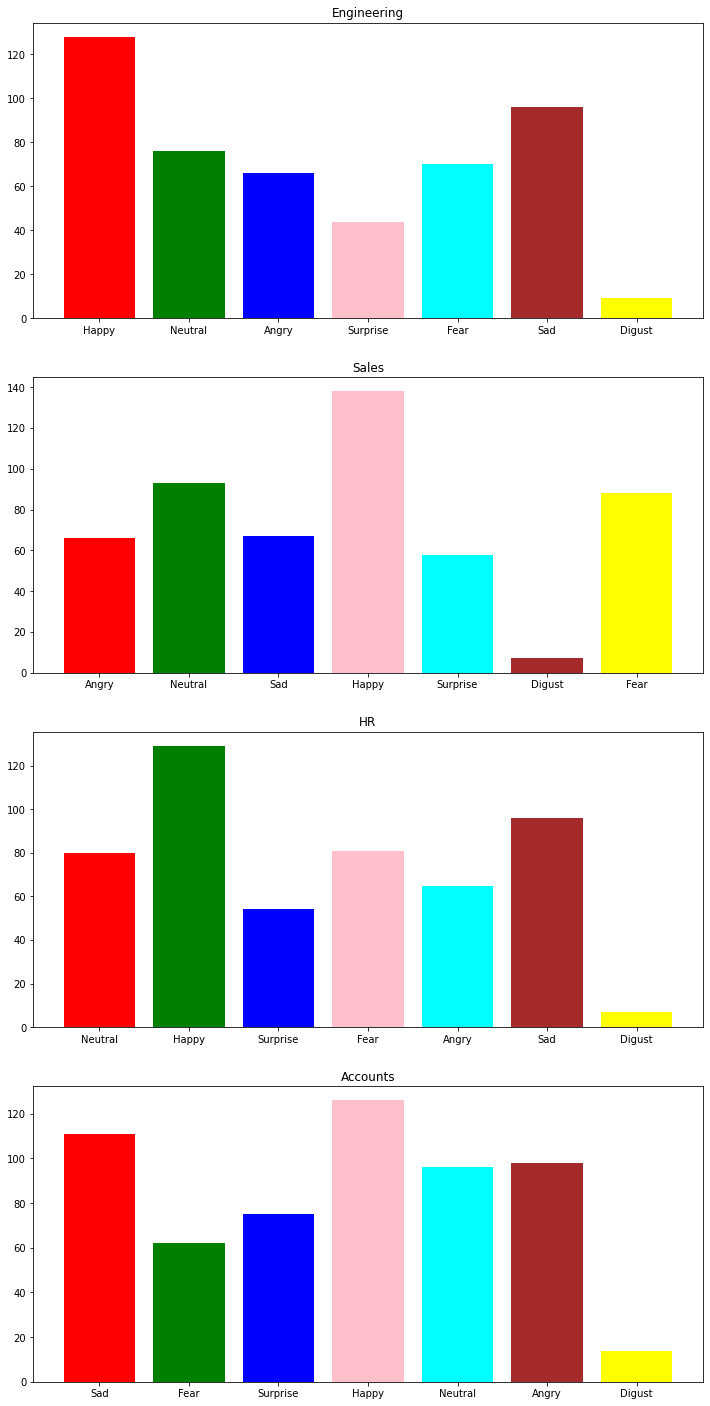

In [ ]:
# department wise analysis
from collections import Counter
dept = ['Engineering', 'Sales', 'HR', 'Accounts']
fig,axs = plt.subplots(nrows=4, ncols=1, figsize=(12,25))
colors = ['red', 'green', 'blue', 'pink', 'cyan', 'brown', 'yellow']
i = 0
for ax in axs:
    temp = employee_details[employee_details['dept'] == dept[i]]
    emo = Counter(temp['emotion'])
    ax.bar(list(emo.keys()), list(emo.values()), color=colors)
    ax.set_title(dept[i])
    i+=1
plt.show()

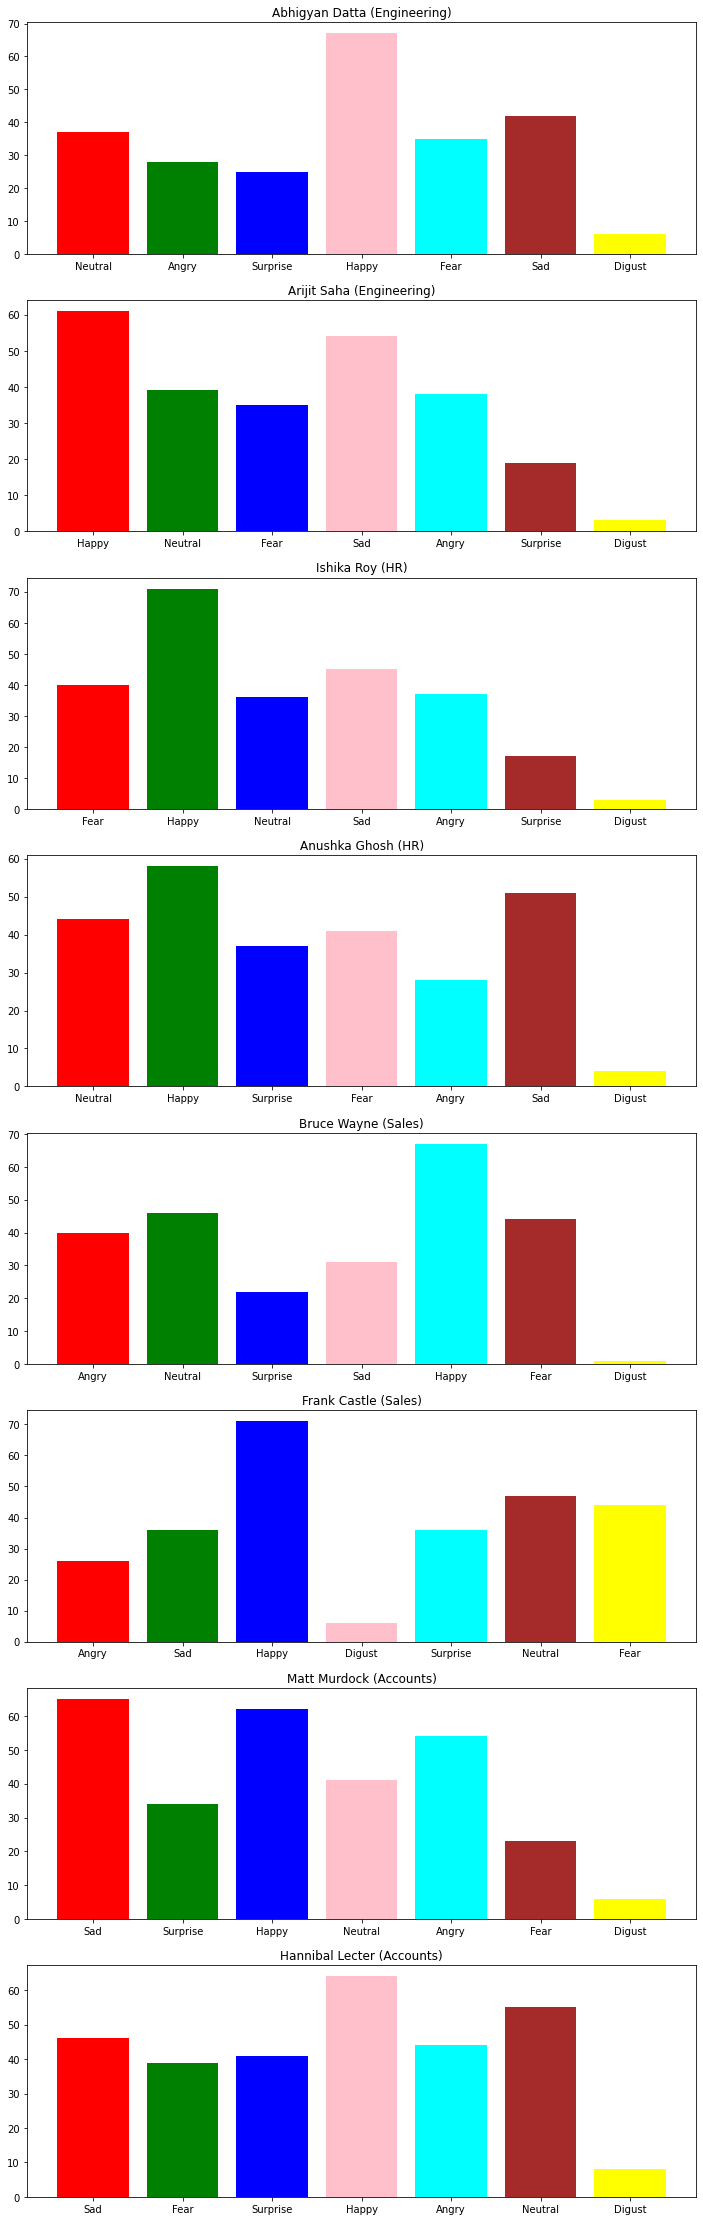

In [ ]:
# manager wise analysis
managers = ['Abhigyan Datta', 'Arijit Saha', 'Ishika Roy', 'Anushka Ghosh',
'Bruce Wayne', 'Frank Castle', 'Matt Murdock', 'Hannibal Lecter']
fig,axs = plt.subplots(nrows=8, ncols=1, figsize=(12,40))
colors = ['red', 'green', 'blue', 'pink', 'cyan', 'brown', 'yellow']
i = 0
for ax in axs:
    temp = employee_details[employee_details['manager'] == managers[i]]
    dep = list(temp['dept'])[0]
    emo = Counter(temp['emotion'])
    ax.bar(list(emo.keys()), list(emo.values()), color=colors)
    ax.set_title(f'{managers[i]} ({dep})')
    i+=1
plt.show()